In [51]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline


In [52]:
# Load dataset
df = pd.read_csv("sales_data.csv")

# Display first few rows
df.head()


,Order ID,Date,Product,Category,Quantity,Sales,Profit,Region
0,CA-1001,2023-01-05,Printer,Office Supplies,2,250.0,40.0,West
1,CA-1002,2023-01-06,Tablet,Technology,1,350.0,60.0,East
2,CA-1003,2023-01-15,Chair,Furniture,4,800.0,120.0,South
3,CA-1004,2023-02-02,Laptop,Technology,1,950.0,150.0,West
4,CA-1005,2023-02-20,Desk,Furniture,1,300.0,50.0,North


In [53]:
# Check dataset info
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic descriptive statistics
print("\nSummary Statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  10 non-null     object 
 1   Date      10 non-null     object 
 2   Product   10 non-null     object 
 3   Category  10 non-null     object 
 4   Quantity  10 non-null     int64  
 5   Sales     10 non-null     float64
 6   Profit    10 non-null     float64
 7   Region    10 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 772.0+ bytes

Missing Values:
Order ID    0
Date        0
Product     0
Category    0
Quantity    0
Sales       0
Profit      0
Region      0
dtype: int64

Summary Statistics:
        Quantity        Sales      Profit
count  10.000000    10.000000   10.000000
mean    2.700000   480.000000   79.500000
std     2.750757   378.557202   65.593445
min     1.000000    25.000000    5.000000
25%     1.000000   262.500000   42.500000
50%     2.000000   375.0000

In [54]:
# Display all column names
df.columns


Index(['Order ID', 'Date', 'Product', 'Category', 'Quantity', 'Sales',
       'Profit', 'Region'],
      dtype='object')

In [55]:
# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract month name
df["Month"] = df["Date"].dt.strftime("%B")

# Check unique months
print(df["Month"].unique())


['January' 'February' 'March' 'April' 'May']


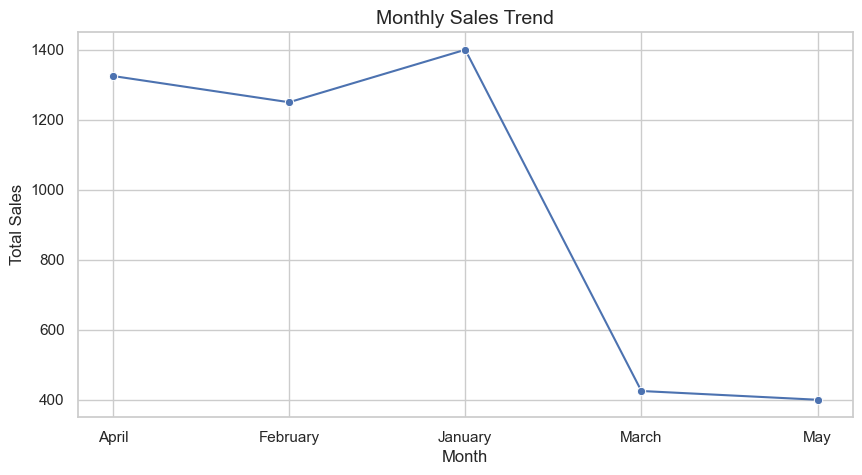

In [56]:
# Group sales by month
monthly_sales = df.groupby("Month")["Sales"].sum().sort_index()

# Plot monthly sales
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_15084\181360137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


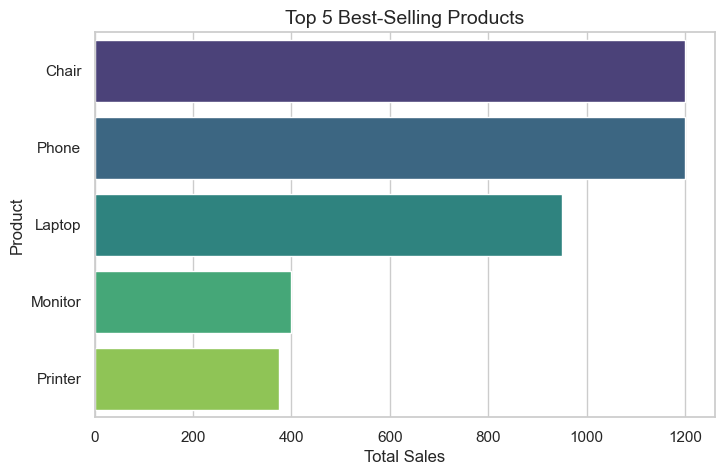

In [57]:
# Top 5 products by sales
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 5 Best-Selling Products", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_15084\109510236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')


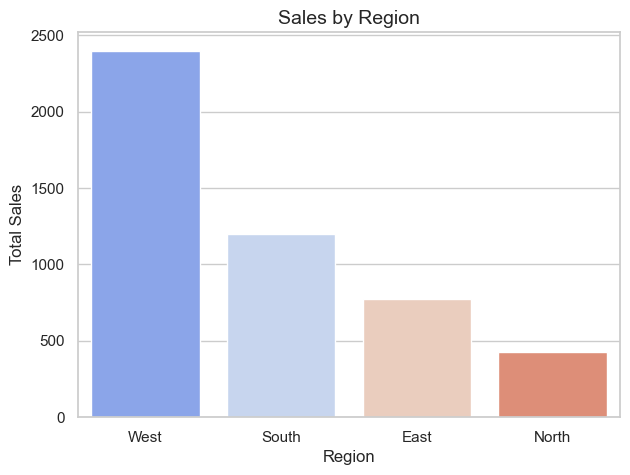

In [58]:
# Group by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')
plt.title("Sales by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


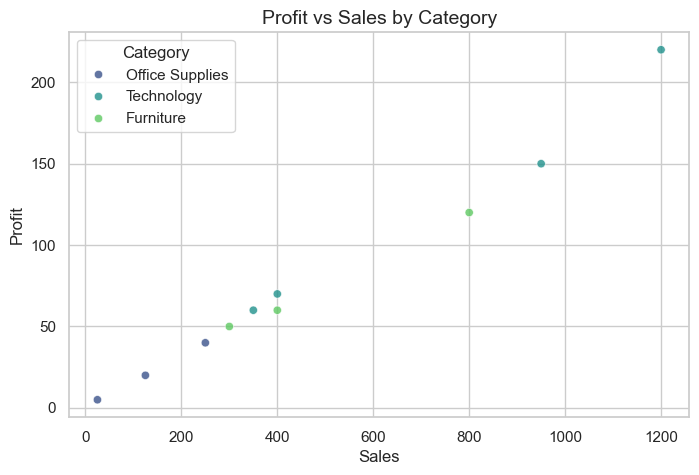

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category", palette="viridis", alpha=0.8)
plt.title("Profit vs Sales by Category", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.show()


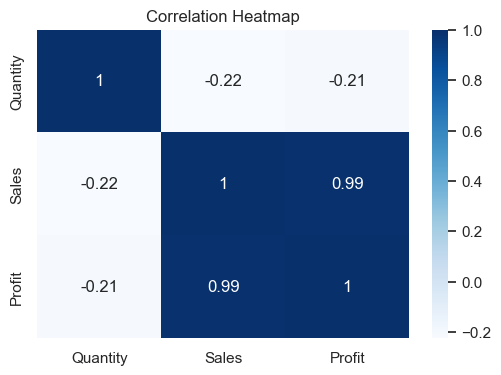

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Quantity","Sales","Profit"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()
